There are some robots and factories on the X-axis. You are given an integer array robot where robot[i] is the position of the ith robot. You are also given a 2D integer array factory where factory[j] = [positionj, limitj] indicates that positionj is the position of the jth factory and that the jth factory can repair at most limitj robots.

The positions of each robot are unique. The positions of each factory are also unique. Note that a robot can be in the same position as a factory initially.

All the robots are initially broken; they keep moving in one direction. The direction could be the negative or the positive direction of the X-axis. When a robot reaches a factory that did not reach its limit, the factory repairs the robot, and it stops moving.

At any moment, you can set the initial direction of moving for some robot. Your target is to minimize the total distance traveled by all the robots.

Return the minimum total distance traveled by all the robots. The test cases are generated such that all the robots can be repaired.

Note that

    All robots move at the same speed.
    If two robots move in the same direction, they will never collide.
    If two robots move in opposite directions and they meet at some point, they do not collide. They cross each other.
    If a robot passes by a factory that reached its limits, it crosses it as if it does not exist.
    If the robot moved from a position x to a position y, the distance it moved is |y - x|.

 

Example 1:

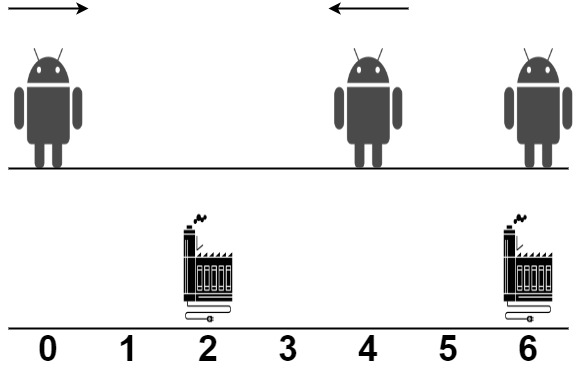

Input: robot = [0,4,6], factory = [[2,2],[6,2]]
Output: 4
Explanation: As shown in the figure:
- The first robot at position 0 moves in the positive direction. It will be repaired at the first factory.
- The second robot at position 4 moves in the negative direction. It will be repaired at the first factory.
- The third robot at position 6 will be repaired at the second factory. It does not need to move.
The limit of the first factory is 2, and it fixed 2 robots.
The limit of the second factory is 2, and it fixed 1 robot.
The total distance is |2 - 0| + |2 - 4| + |6 - 6| = 4. It can be shown that we cannot achieve a better total distance than 4.

Example 2:

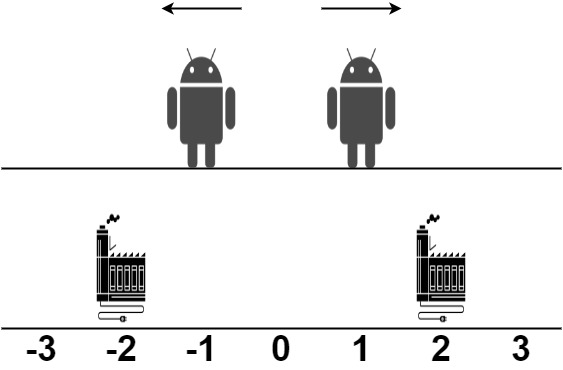

Input: robot = [1,-1], factory = [[-2,1],[2,1]]
Output: 2
Explanation: As shown in the figure:
- The first robot at position 1 moves in the positive direction. It will be repaired at the second factory.
- The second robot at position -1 moves in the negative direction. It will be repaired at the first factory.
The limit of the first factory is 1, and it fixed 1 robot.
The limit of the second factory is 1, and it fixed 1 robot.
The total distance is |2 - 1| + |(-2) - (-1)| = 2. It can be shown that we cannot achieve a better total distance than 2.

 

Constraints:

    1 <= robot.length, factory.length <= 100
    factory[j].length == 2
    -109 <= robot[i], positionj <= 109
    0 <= limitj <= robot.length
    The input will be generated such that it is always possible to repair every robot.



In [ ]:
class Solution:
    def minimumTotalDistance(self, robot: List[int], factory: List[List[int]]) -> int:
        # Sort robots and factories by position
        robot.sort()
        factory.sort(key=lambda x: x[0])

        # Flatten factory positions according to their capacities
        factory_positions = []
        for f in factory:
            for _ in range(f[1]):
                factory_positions.append(f[0])

        robot_count, factory_count = len(robot), len(factory_positions)
        dp = [[0] * (factory_count + 1) for _ in range(robot_count + 1)]

        # Initialize base cases
        for i in range(robot_count):
            dp[i][factory_count] = 1e12  # No factories left

        # Fill DP table bottom-up
        for i in range(robot_count - 1, -1, -1):
            for j in range(factory_count - 1, -1, -1):
                # Option 1: Assign current robot to current factory
                assign = abs(robot[i] - factory_positions[j]) + dp[i + 1][j + 1]

                # Option 2: Skip current factory for the current robot
                skip = dp[i][j + 1]

                dp[i][j] = min(assign, skip)  # Take the minimum option

        # Minimum distance starting from first robot and factory
        return dp[0][0]  